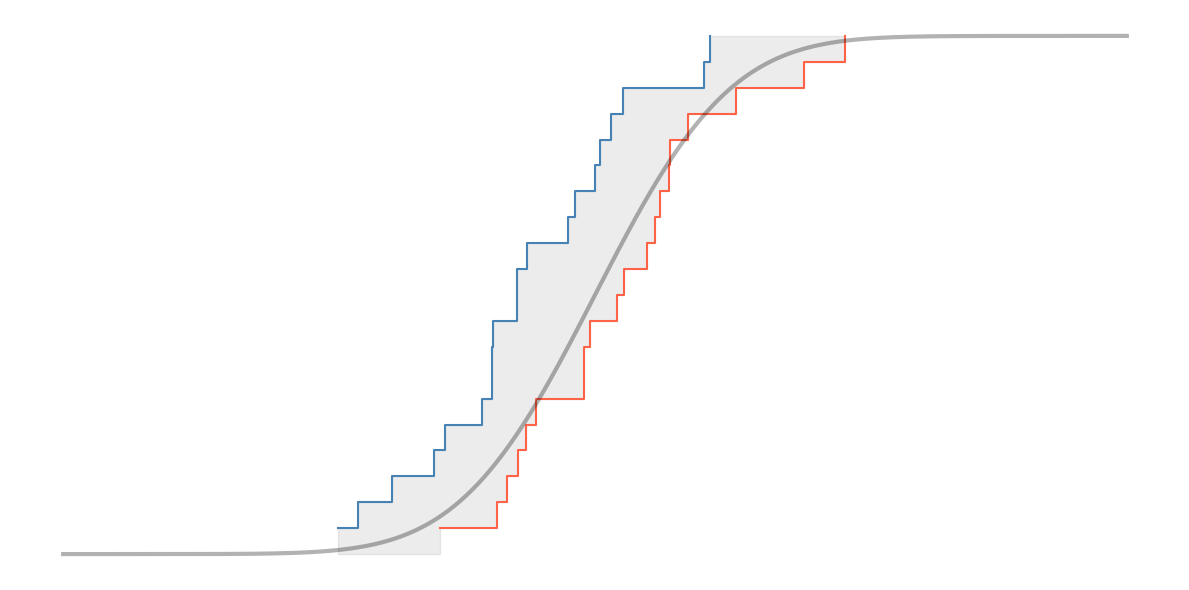

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Setup
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Data: shifted left and right
np.random.seed(42)
data_left = np.sort(np.random.normal(loc=-0.5, scale=1, size=20))
data_right = np.sort(np.random.normal(loc=0.5, scale=1, size=20))

# ECDF function
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Get ECDFs
x1, y1 = ecdf(data_left)
x2, y2 = ecdf(data_right)

# Merge all x-values for consistent step alignment
x_all = np.sort(np.unique(np.concatenate((x1, x2))))
y1_interp = np.searchsorted(x1, x_all, side='right') / len(x1)
y2_interp = np.searchsorted(x2, x_all, side='right') / len(x2)

# Plot ECDF steps
ax.step(x1, y1, where='post', color='steelblue', linewidth=1.5)
ax.step(x2, y2, where='post', color='tomato', linewidth=1.5)

# Fill between ECDF steps with exact stair-step logic
ax.fill_between(x_all, y1_interp, y2_interp, step='post', color='gray', alpha=0.15)

# True CDF
x_vals = np.linspace(-5, 5, 1000)
ax.plot(x_vals, norm.cdf(x_vals, loc=0, scale=1), color='black', linewidth=3, alpha=0.3)

# Remove ticks and spines for clean look
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


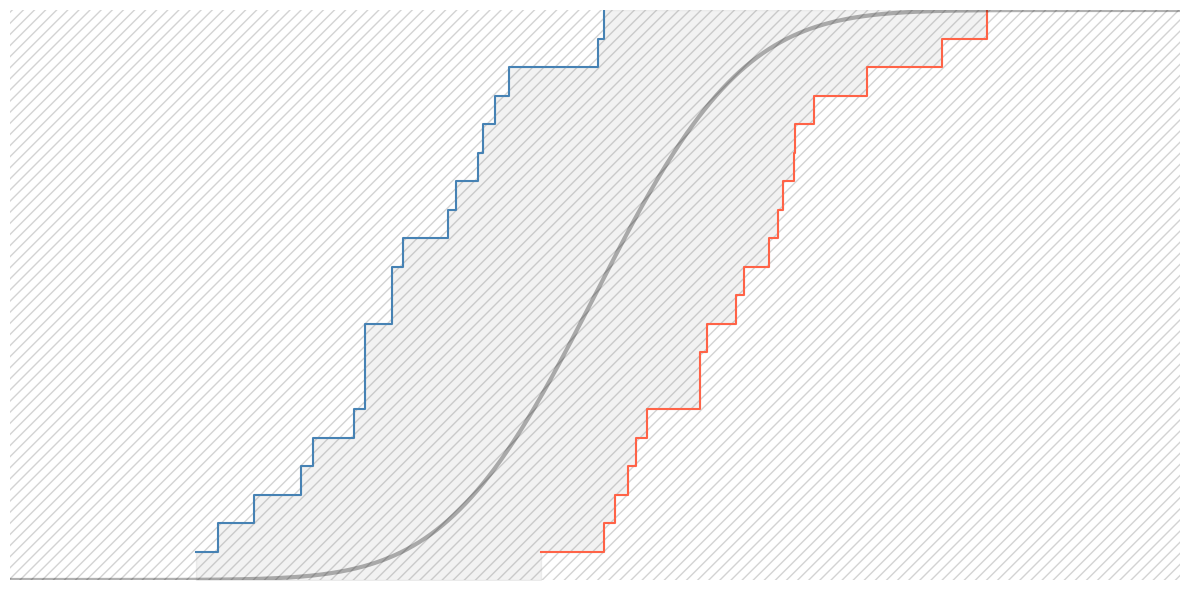

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib.patches import Rectangle

# Setup
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Add 45° hatched rectangle as background
rect = Rectangle(
    (ax.get_xlim()[0], ax.get_ylim()[0]), 10, 1,  # placeholder limits
    facecolor='white', edgecolor='lightgray', hatch='///', linewidth=0.0, zorder=0
)
ax.add_patch(rect)

# Generate ECDF data
np.random.seed(42)
data_left = np.sort(np.random.normal(loc=-1.5, scale=1, size=20))
data_right = np.sort(np.random.normal(loc=1.5, scale=1, size=20))

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

x1, y1 = ecdf(data_left)
x2, y2 = ecdf(data_right)

# Common x axis for aligned steps
x_all = np.sort(np.unique(np.concatenate((x1, x2))))
y1_interp = np.searchsorted(x1, x_all, side='right') / len(x1)
y2_interp = np.searchsorted(x2, x_all, side='right') / len(x2)

# Plot ECDF steps
ax.step(x1, y1, where='post', color='steelblue', linewidth=1.5)
ax.step(x2, y2, where='post', color='tomato', linewidth=1.5)
ax.fill_between(x_all, y1_interp, y2_interp, step='post', color='gray', alpha=0.1)

# True CDF
x_vals = np.linspace(-5, 5, 1000)
ax.plot(x_vals, norm.cdf(x_vals), color='black', linewidth=3, alpha=0.3)

# Clean look
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust rectangle to actual limits
ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
rect.set_bounds(-5, 0, 10, 1)

plt.tight_layout()
plt.show()


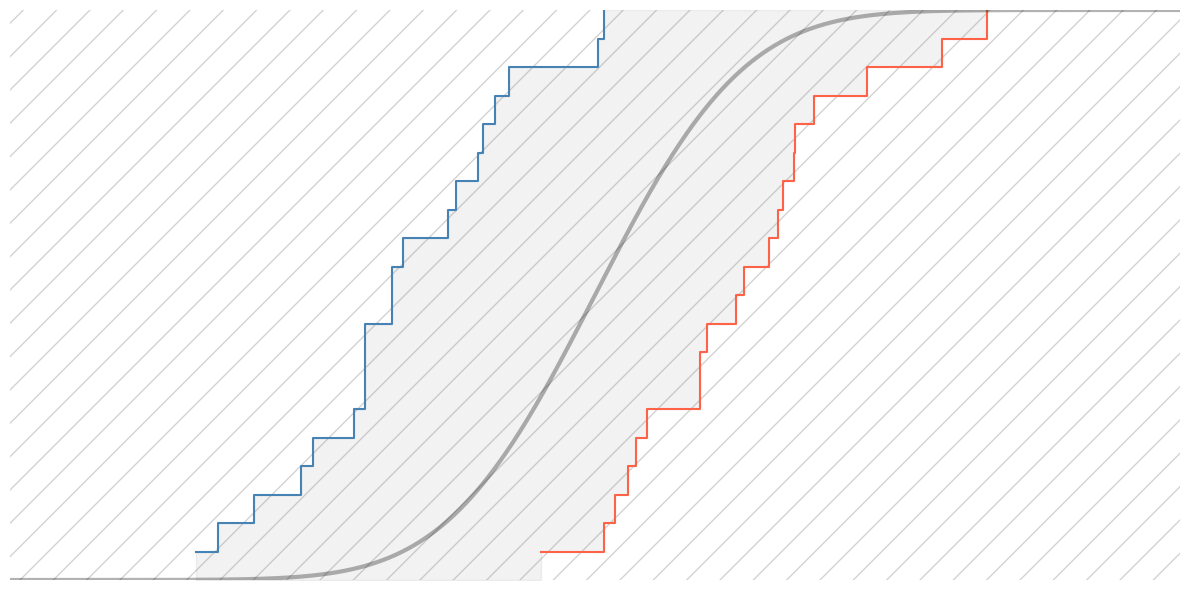

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib.patches import Rectangle

# Setup
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set axis limits before adding the background
ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)

# Add 45° sparse hatched rectangle background
rect = Rectangle(
    (-5, 0), 10, 1,  # full span of x and y
    facecolor='white',
    edgecolor='lightgray',
    hatch='/',        # sparse diagonal
    linewidth=0.0,
    zorder=0
)
ax.add_patch(rect)

# Generate ECDF data
np.random.seed(42)
data_left = np.sort(np.random.normal(loc=-1.5, scale=1, size=20))
data_right = np.sort(np.random.normal(loc=1.5, scale=1, size=20))

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

x1, y1 = ecdf(data_left)
x2, y2 = ecdf(data_right)

# Common x axis for aligned steps
x_all = np.sort(np.unique(np.concatenate((x1, x2))))
y1_interp = np.searchsorted(x1, x_all, side='right') / len(x1)
y2_interp = np.searchsorted(x2, x_all, side='right') / len(x2)

# Plot ECDFs
ax.step(x1, y1, where='post', color='steelblue', linewidth=1.5)
ax.step(x2, y2, where='post', color='tomato', linewidth=1.5)
ax.fill_between(x_all, y1_interp, y2_interp, step='post', color='gray', alpha=0.1)

# True CDF
x_vals = np.linspace(-5, 5, 1000)
ax.plot(x_vals, norm.cdf(x_vals), color='black', linewidth=3, alpha=0.3)

# Clean look
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


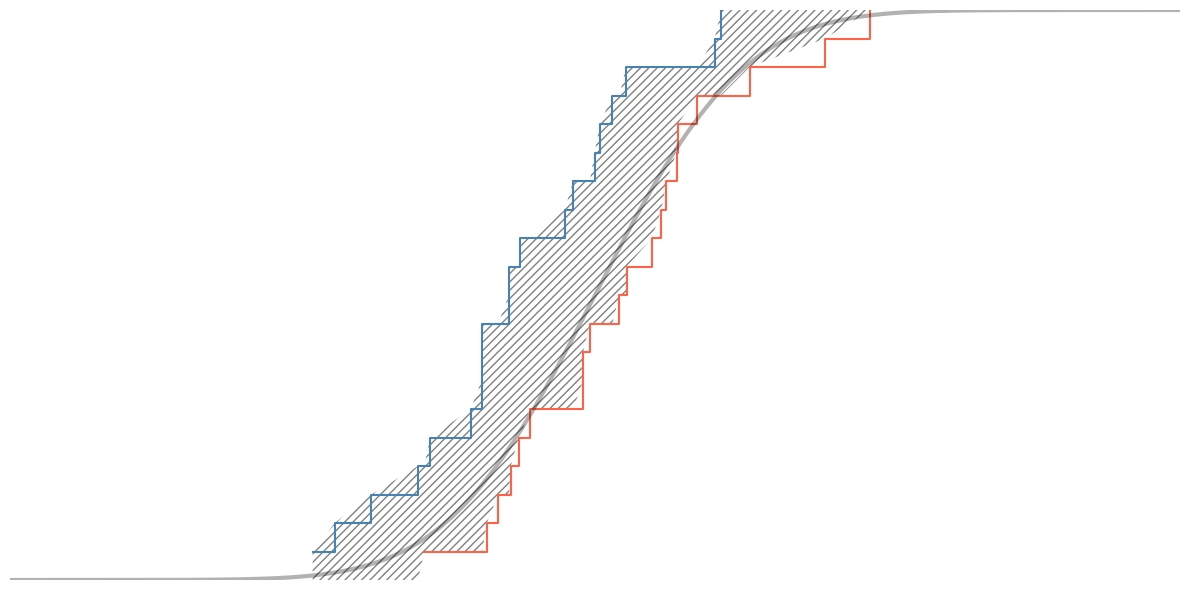

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib.patches import Polygon

# Setup
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('white')

# Generate ECDF data
np.random.seed(42)
data_left = np.sort(np.random.normal(loc=-0.5, scale=1, size=20))
data_right = np.sort(np.random.normal(loc=0.5, scale=1, size=20))

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x1, y1 = ecdf(data_left)
x2, y2 = ecdf(data_right)

# Merge x and interpolate ECDFs to same x-points
x_all = np.sort(np.unique(np.concatenate((x1, x2))))
y1_interp = np.searchsorted(x1, x_all, side='right') / len(x1)
y2_interp = np.searchsorted(x2, x_all, side='right') / len(x2)

# Create a polygon for the area between ECDFs
verts = np.concatenate([
    np.column_stack([x_all, y1_interp]),
    np.column_stack([x_all[::-1], y2_interp[::-1]])
])
poly = Polygon(verts, closed=True, facecolor='none', edgecolor='gray', hatch='////', linewidth=0.0, zorder=1)
ax.add_patch(poly)

# Plot ECDFs
ax.step(x1, y1, where='post', color='steelblue', linewidth=1.5)
ax.step(x2, y2, where='post', color='tomato', linewidth=1.5)

# Plot true CDF
x_vals = np.linspace(-5, 5, 1000)
ax.plot(x_vals, norm.cdf(x_vals), color='black', linewidth=3, alpha=0.3)

# Clean look
ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()
